# Natural Language Toolkit (NLTK)

NLTK (https://www.nltk.org/) is a suite of libraries and programmes for symbolic and ***statistical natural language processing*** for English written in the Python programming language. It supports classification, tokenisation, stemming, tagging, parsing, and semantic reasoning functionalities.

In [1]:
!pip install gensim
!pip install yake
!pip install pyvirtualdisplay
!sudo apt-get install xvfb
!pip install spacy
!pip install docx
!pip install exceptions
!pip install snownlp
# !pip install googletrans
!pip install translate
!python -m spacy download en_core_web_sm
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 787.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import yake
from nltk import pos_tag, word_tokenize
from nltk.tree import Tree
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from graphviz import Source
from graphviz import Digraph
from IPython.display import Image, display
import matplotlib.pyplot as plt
%matplotlib inline
import io

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Tokenisation**

Tokenisation is a fundamental step in Natural Language Processing (NLP). It is ***the process of breaking down text into smaller pieces***, called tokens. These tokens help machines understand the context of the text. A token could be a word. The token could be a word, a group of words, sentence, paragraph, or an entire document to analyse.

Tokenisation is necessary in NLP because it helps in interpreting the meaning of the text by analysing its semantics. It is easier to identify the base forms of words, the affixes attached to them, and the words’ context after tokenisation. Tokenisation is performed by ***locating word boundaries***. Ending point of a word and beginning of the next word is called word boundaries. Tokenisation is also about deciding where to separate the text based on specific characters such as whitespace, punctuation, etc.

In [18]:
text = "The environment in which people live affects their health. Urban living has been connected to a rise in several chronic health conditions including mental health disorders, such as depression. In England, 82.9% of the population resides in urban areas, with cities continuing to grow faster than rural areas. Addressing young Londoners’ mental health and wellbeing, and improving the environment and access to nature are key priorities for the current Mayor of London. A growing body of empirical research has connected exposure to green spaces with benefits to human health. Green spaces can provide physical and mental health benefits in several ways, such as presenting opportunities for exercise and other physical activity; reducing stress; and mitigating environmental harms, including air, water and noise pollution, flooding risks, and urban heating. Research indicates green spaces contribute to the prevention, reduction, and treatment of chronic conditions such as type 2 diabetes, cardiovascular disease16, and obesity. People who visit nature at least once a week are 1.9 times more likely to also report good general health."

In [19]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Extract the text from the document
#text = "According to others, the gods live in the buckets that rise, suspended from a cable, as they appear over the edge of the wells, in the revolving pulleys, in the windlasses of the norias, in the pump handles, in the blades of the windmills that draw the water up from the drillings, in the trestles that support the twisting probes, in the reservoirs perched on stilts over the roofs, in the slender arches of the aqueducts , in all the columns of water, the vertical pipes, the plungers, the drains, all the way up to the weathercocks that surmount the airy scaffoldings of Isaura, a city that moves entirely upward."

# First extract the text from the document, then apply the language model to the text, and subsequently extract the words and their corresponding POS (Part-of-Speech) tags. Finally, display the dependency tree using the Spacy Python package.
doc = nlp(text)

# Extract the words and their corresponding POS tags ,Display the dependency tree
pos_tags = [(token.text, token.pos_) for token in doc]

# Print the words and their POS tags
for word, pos in pos_tags:
    print(f"'{word}': {pos}")

'The': DET
'environment': NOUN
'in': ADP
'which': PRON
'people': NOUN
'live': VERB
'affects': VERB
'their': PRON
'health': NOUN
'.': PUNCT
'Urban': ADJ
'living': NOUN
'has': AUX
'been': AUX
'connected': VERB
'to': ADP
'a': DET
'rise': NOUN
'in': ADP
'several': ADJ
'chronic': ADJ
'health': NOUN
'conditions': NOUN
'including': VERB
'mental': ADJ
'health': NOUN
'disorders': NOUN
',': PUNCT
'such': ADJ
'as': ADP
'depression': NOUN
'.': PUNCT
'In': ADP
'England': PROPN
',': PUNCT
'82.9': NUM
'%': NOUN
'of': ADP
'the': DET
'population': NOUN
'resides': VERB
'in': ADP
'urban': ADJ
'areas': NOUN
',': PUNCT
'with': ADP
'cities': NOUN
'continuing': VERB
'to': PART
'grow': VERB
'faster': ADV
'than': ADP
'rural': ADJ
'areas': NOUN
'.': PUNCT
'Addressing': VERB
'young': ADJ
'Londoners': PROPN
'’': PART
'mental': ADJ
'health': NOUN
'and': CCONJ
'wellbeing': NOUN
',': PUNCT
'and': CCONJ
'improving': VERB
'the': DET
'environment': NOUN
'and': CCONJ
'access': NOUN
'to': ADP
'nature': NOUN
'are': AUX
'k

## Dependency Parsing

In NLP, there are several types of parse trees that you can generate, each providing different insights into the structure of a sentence. Here are a few examples:

*   ***Dependency Parse Trees:*** These trees keep the words in the sentence as the nodes in the tree and use directed edges to show dependency relations between the words. Each edge is labeled with the type of grammatical relationship.
*   ***Constituency Parse Trees:*** These trees break a text down into sub-phrases, or constituents. Non-terminal nodes in the tree are types of phrases, the terminal nodes are the words in the sentence, and the edges are unlabeled.
*   ***Named Entity Recognition (NER) Trees:*** These are not traditional parse trees but are similar in that they show the structure of a sentence. In NER trees, the nodes are words or entities in the sentence, and the edges show the relationships between different entities.
*   ***Semantic Role Labeling (SRL) Trees:*** These trees identify the semantic relationships among the words in a sentence. They label the sentence’s predicates (usually verbs) and their arguments (usually noun phrases).



### Visulise Parsing Tree

***Dependency Parsing*** is a technique in NLP that can reveal the grammatical relationships between words in a sentence. This analysis can help understand the structure and meaning of a sentence, thereby influencing the generation of text to image.

Here are some ways Dependency Parsing might influence text to image generation:

*   ***Improving Understanding of Object Relationships***: Dependency Parsing can help identify the main objects in a sentence and their relationships. For example, in the sentence “The cat is sitting on the chair”, Dependency Parsing can reveal that the “cat” is the main actor, the “chair” is the location, and “sitting on…” describes their relationship. This information can be used to generate an image more accurately.
*   ***Identifying Important Details***: Dependency Parsing can also help identify adjectives that describe objects or actions, which can provide important details needed when generating an image. For example, in the sentence “The happy little dog is playing in the park”, “happy” and “little” describe the dog’s state and size, while “in the park” describes the scene. These details can help generate a more specific and vivid image.
*   ***Resolving Ambiguity***: Sometimes, the structure of a sentence can lead to ambiguity, and Dependency Parsing can help resolve these ambiguities. For example, in the sentence “I saw her on the riverbank with a telescope”, is the “telescope” used for seeing, or is she on the riverbank with a telescope? Dependency Parsing can help determine the correct interpretation, thereby generating the correct image.





#### Save Dependency Parse Tree in SVG

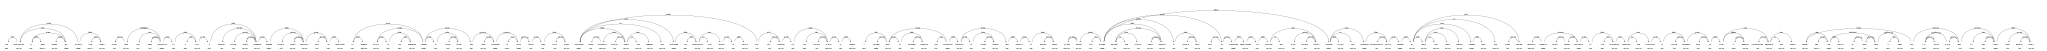

In [20]:
# Load the English language model
from bs4 import BeautifulSoup

# Define the text you want to analyze
text = "The environment in which people live affects their health. Urban living has been connected to a rise in several chronic health conditions including mental health disorders, such as depression. In England, 82.9% of the population resides in urban areas, with cities continuing to grow faster than rural areas. Addressing young Londoners’ mental health and wellbeing, and improving the environment and access to nature are key priorities for the current Mayor of London. A growing body of empirical research has connected exposure to green spaces with benefits to human health. Green spaces can provide physical and mental health benefits in several ways, such as presenting opportunities for exercise and other physical activity; reducing stress; and mitigating environmental harms, including air, water and noise pollution, flooding risks, and urban heating. Research indicates green spaces contribute to the prevention, reduction, and treatment of chronic conditions such as type 2 diabetes, cardiovascular disease16, and obesity. People who visit nature at least once a week are 1.9 times more likely to also report good general health."

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Apply the language model to the text
doc = nlp(text)

# Render the dependency tree as SVG
svg = displacy.render(doc, style='dep', jupyter=False)

# Parse the SVG string with BeautifulSoup
soup = BeautifulSoup(svg, 'xml')

# Select all text elements and change their font size
for text in soup.find_all('text'):
    text['style'] = 'font-size: 30px'  # Change to desired font size

# Get the new SVG string
new_svg = str(soup)

# Save the SVG string as a file
svg_filename = 'tree' #@param{type:'string'}
svg_filepath = '/content/drive/MyDrive/' + svg_filename + '.svg'
with open(svg_filepath, 'w') as f:
    f.write(new_svg)

# Display the SVG image
from IPython.display import SVG, display
display(SVG(filename=svg_filepath))

#### Save Dependency Parse Tree in PNG

In [21]:
# Load necessary libraries
import spacy
from spacy import displacy
from bs4 import BeautifulSoup
from PIL import Image
import io
import cairosvg

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define the text you want to analyze
text = "The environment in which people live affects their health. Urban living has been connected to a rise in several chronic health conditions including mental health disorders, such as depression. In England, 82.9% of the population resides in urban areas, with cities continuing to grow faster than rural areas. Addressing young Londoners’ mental health and wellbeing, and improving the environment and access to nature are key priorities for the current Mayor of London. A growing body of empirical research has connected exposure to green spaces with benefits to human health. Green spaces can provide physical and mental health benefits in several ways, such as presenting opportunities for exercise and other physical activity; reducing stress; and mitigating environmental harms, including air, water and noise pollution, flooding risks, and urban heating. Research indicates green spaces contribute to the prevention, reduction, and treatment of chronic conditions such as type 2 diabetes, cardiovascular disease16, and obesity. People who visit nature at least once a week are 1.9 times more likely to also report good general health." #@param{type:'string'}

# Apply the language model to the text
doc = nlp(text)

# Render the dependency tree as SVG
svg = displacy.render(doc, style='dep', jupyter=False)

# Parse the SVG string with BeautifulSoup
soup = BeautifulSoup(svg, 'xml')

# Select all text elements and change their font size
for text_element in soup.find_all('text'):
    text_element['style'] = 'font-size: 30px'  # Change to desired font size

# Get the new SVG string
new_svg = str(soup)

# Convert SVG string to PNG using CairoSVG
png = cairosvg.svg2png(bytestring=new_svg)

# Convert PNG byte data to an image object
image = Image.open(io.BytesIO(png))

# Save the image object as a PNG file
tree_image_file_name = 'dependency_tree' #@param{type:'string'}
img_dir = '/content/drive/MyDrive/' + tree_image_file_name + '.png'
image.save(img_dir)  # Replace with your preferred path

# If you're using a Jupyter notebook or similar, you can display the image
# image.show()


In [22]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Apply the language model to the text
doc = nlp(text)

# Save the dependency tree to a file
svg = displacy.render(doc, style='dep', jupyter=False)

# Display the dependency tree
# display(Image(data=svg))
displacy.render(doc, style='dep', jupyter=True)

# Save the SVG string as a file in google drive
file_name = 'parse_tree_vec' #@param{type:'string'}
saving_dir = '/content/drive/MyDrive/' + file_name + '.svg'
with open(saving_dir, 'w') as f:
    f.write(svg)

In [23]:
# download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Initialise preprocessing tool
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
nltk.download('punkt')  # Download the NLTK's "punkt" package (only need to do it once)

sentences = nltk.tokenize.sent_tokenize(text)  # Split text into sentences
# sentences = [nltk.tokenize.word_tokenize(s) for s in sentences]  # Split each sentence into words
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The environment in which people live affects their health.',
 'Urban living has been connected to a rise in several chronic health conditions including mental health disorders, such as depression.',
 'In England, 82.9% of the population resides in urban areas, with cities continuing to grow faster than rural areas.',
 'Addressing young Londoners’ mental health and wellbeing, and improving the environment and access to nature are key priorities for the current Mayor of London.',
 'A growing body of empirical research has connected exposure to green spaces with benefits to human health.',
 'Green spaces can provide physical and mental health benefits in several ways, such as presenting opportunities for exercise and other physical activity; reducing stress; and mitigating environmental harms, including air, water and noise pollution, flooding risks, and urban heating.',
 'Research indicates green spaces contribute to the prevention, reduction, and treatment of chronic conditions such a

In [25]:
# tokenise text
tokens = nltk.word_tokenize(text)

# Remove stop words and perform word stemming
tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

# Using YAKE to determine keywords/descriptors
kw_extractor = yake.KeywordExtractor()

keywords = kw_extractor.extract_keywords(text)

print("Key words:", keywords) # A 'keywords' includes extracted keywords and their relevance score

Key words: [('people live affects', 0.021961401938011393), ('live affects', 0.03613276788415779), ('health', 0.06159060149590375), ('mental health', 0.06789166526195178), ('Londoners’ mental health', 0.07996088466278468), ('green spaces', 0.08361236571992756), ('Mayor of London', 0.10385165215255975), ('people live', 0.10531039086151657), ('mental health disorders', 0.1067330991340555), ('young Londoners’ mental', 0.12195874394974858), ('mental', 0.13082620298509093), ('Urban', 0.13592321637293242), ('including mental health', 0.14066656648423453), ('Londoners’ mental', 0.14330750163986428), ('green', 0.14927059085498098), ('spaces', 0.14927059085498098), ('mental health benefits', 0.1597404112970646), ('conditions including mental', 0.17833394151599463), ('environment', 0.1845039145019767), ('live', 0.18674238936932638)]


## Word Cloud Visualisation

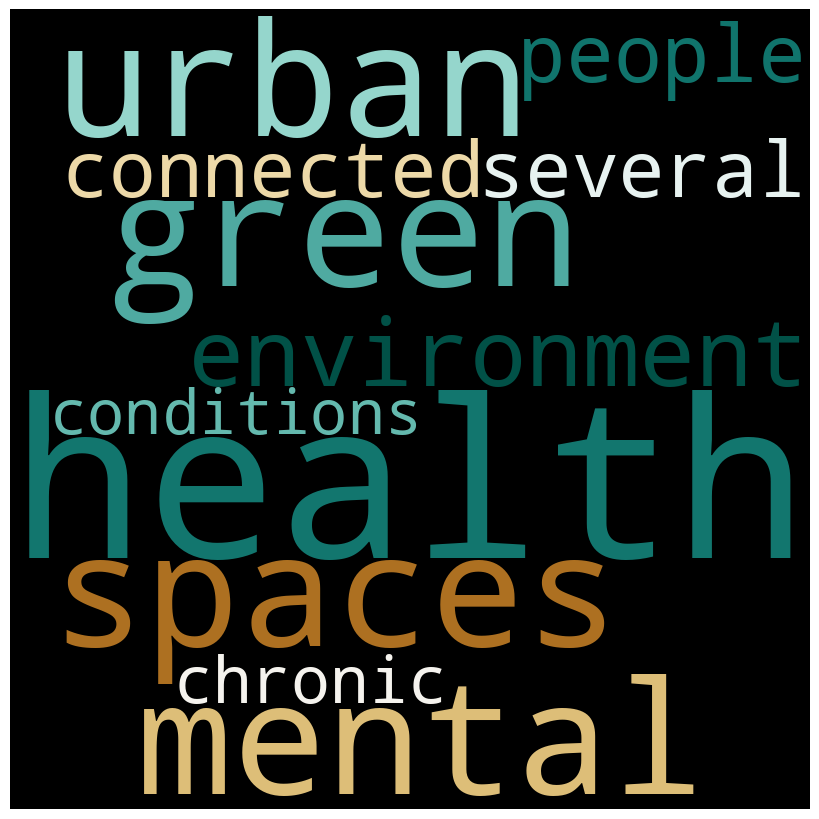

In [26]:
# Define the text you want to analyze
text = "The environment in which people live affects their health. Urban living has been connected to a rise in several chronic health conditions including mental health disorders, such as depression. In England, 82.9% of the population resides in urban areas, with cities continuing to grow faster than rural areas. Addressing young Londoners’ mental health and wellbeing, and improving the environment and access to nature are key priorities for the current Mayor of London. A growing body of empirical research has connected exposure to green spaces with benefits to human health. Green spaces can provide physical and mental health benefits in several ways, such as presenting opportunities for exercise and other physical activity; reducing stress; and mitigating environmental harms, including air, water and noise pollution, flooding risks, and urban heating. Research indicates green spaces contribute to the prevention, reduction, and treatment of chronic conditions such as type 2 diabetes, cardiovascular disease16, and obesity. People who visit nature at least once a week are 1.9 times more likely to also report good general health." #@param{type:'string'}

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 50,
                max_font_size = 500).generate(text)

# Apply colourmap
wordcloud = wordcloud.recolor(colormap='BrBG')

# Visualise word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Text Graph Visualisation

Here, nodes are individual words from the keywords, and edges are connections between keywords. This means that if two keywords share a word, there will be an edge between them. For example, if the keywords are “apple pie” and “pie chart”, then “apple”, “pie”, and “chart” will all be added as nodes, and there will be edges between “apple” and “pie”, and “pie” and “chart”.

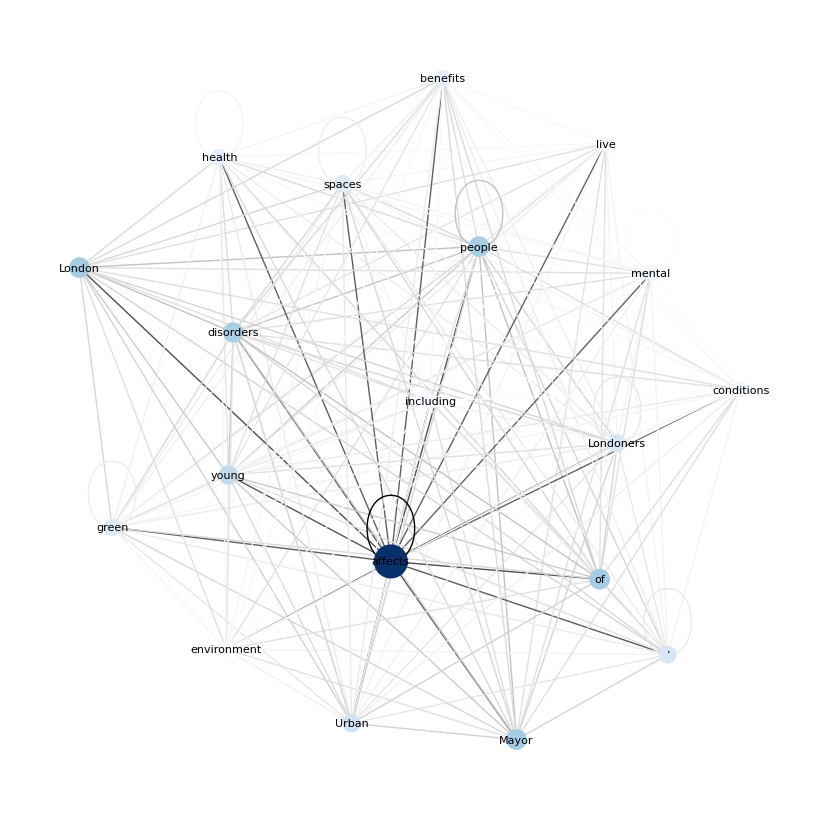

In [27]:
# tokenise text
tokens = nltk.word_tokenize(text)

# Remove stop words and perform word stemming
tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

# Using YAKE to determine keywords/descriptors
kw_extractor = yake.KeywordExtractor()

keywords = kw_extractor.extract_keywords(text)

# Create graph
G = nx.Graph()

# Add nodes
for keyword, score in keywords:
    for word in nltk.word_tokenize(keyword):  # Split keywords into individual words
        G.add_node(word, size=1/score)

# Add edges
for i in range(len(keywords)):
    for j in range(i+1, len(keywords)):
        for word1 in nltk.word_tokenize(keywords[i][0]):
            for word2 in nltk.word_tokenize(keywords[j][0]):
                G.add_edge(word1, word2)

# Node size and colour
sizes = [G.nodes[node]['size']*20 for node in G.nodes]
colors = np.log([G.nodes[node]['size'] for node in G.nodes])

# Calculate the importance of edges
edge_importance = [(G.nodes[edge[0]]['size'] + G.nodes[edge[1]]['size']) / 2 for edge in G.edges]

# Map importance scores to the colour space
edge_colors = np.log(edge_importance)

# Compute node position
pos = nx.spring_layout(G, seed=42)

# Set figure size
plt.figure(figsize=(8, 8))

# draw graph
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color=colors, font_size=8, edge_color=edge_colors, edge_cmap=plt.cm.Greys, cmap=plt.cm.Blues)


In the following case, nodes are the keywords themselves, and edges are connections between keywords. This means that each keyword is treated as a whole, and there is an edge between each pair of keywords. For example, if the keywords are “apple pie” and “pie chart”, then “apple pie” and “pie chart” will be added as nodes, and there will be an edge between them.

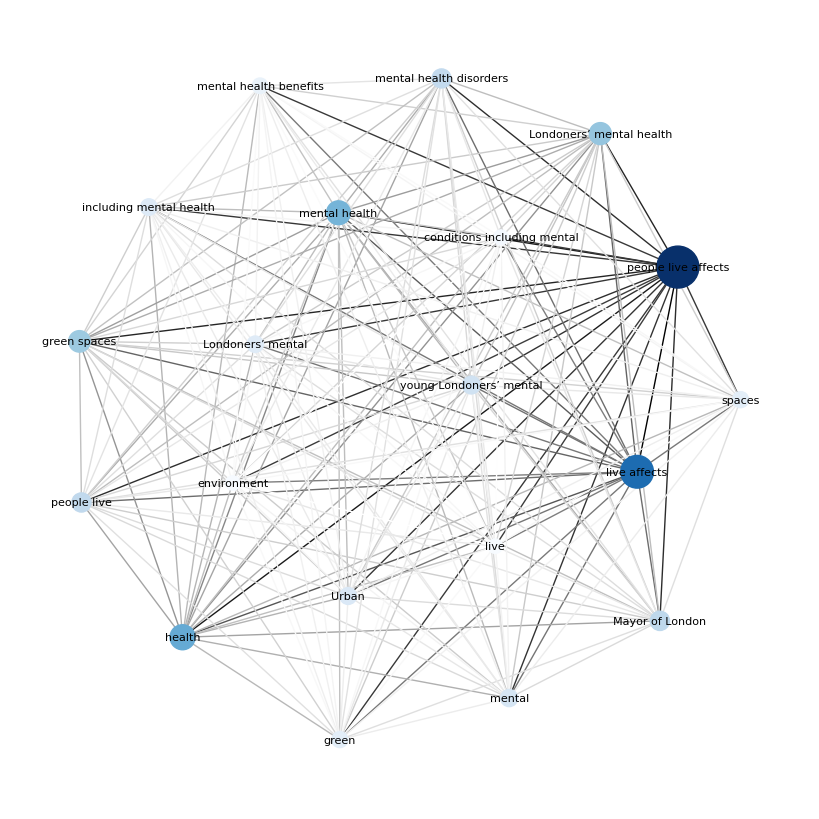

In [29]:
# Create graph
G = nx.Graph()

# Add nodes
for keyword, score in keywords:
    G.add_node(keyword, size=1/score)

# Add edges
for i in range(len(keywords)):
    for j in range(i+1, len(keywords)):
        G.add_edge(keywords[i][0], keywords[j][0])

# Node size and colour
sizes = [G.nodes[node]['size']*20 for node in G.nodes]
colors = np.log([G.nodes[node]['size'] for node in G.nodes])

# Calculate the importance of edges
edge_importance = [(G.nodes[edge[0]]['size'] + G.nodes[edge[1]]['size']) / 2 for edge in G.edges]

# Map importance scores to the colour space
edge_colors = np.log(edge_importance)

# Compute node position
pos = nx.spring_layout(G, seed=42)

# Set figure size
plt.figure(figsize=(8, 8))

# draw graph
nx.draw(G, pos, with_labels=True, node_size=sizes, node_color=colors, font_size=8, edge_color=edge_colors, edge_cmap=plt.cm.Greys, cmap=plt.cm.Blues)

In summary, The main difference between the two pieces of code is how nodes and edges are added to the graph. The choice between these two methods depends on how you want to represent your data. If you want to analyze the relationships between words, the first method might be more appropriate. If you want to analyze the relationships between keywords, the second method might be more appropriate.

In [30]:
import pandas as pd

# Convert NodeDataView to dictionary
node_data = {node: attr for node, attr in G.nodes(data=True)}

# Create a dataframe for the importance of nodes
node_importance = pd.DataFrame.from_dict(node_data, orient='index').reset_index()
node_importance.columns = ['Node', 'Attributes']
node_importance['Importance'] = node_importance['Attributes'].apply(lambda x: x)

# Create a dataframe for the importance of edges
edge_importance_df = pd.DataFrame(edge_importance, columns=['Importance'])
edge_importance_df['Edge'] = list(G.edges())

# Reorder the columns
edge_importance_df = edge_importance_df[['Edge', 'Importance']]

# Print the dataframes
print(node_importance)
print(edge_importance_df)


                           Node  Attributes  Importance
0             Londoners’ mental    6.978002    6.978002
1      Londoners’ mental health   12.506115   12.506115
2               Mayor of London    9.629120    9.629120
3                         Urban    7.357095    7.357095
4   conditions including mental    5.607458    5.607458
5                   environment    5.419939    5.419939
6                         green    6.699243    6.699243
7                  green spaces   11.959953   11.959953
8                        health   16.236243   16.236243
9       including mental health    7.109010    7.109010
10                         live    5.354971    5.354971
11                 live affects   27.675710   27.675710
12                       mental    7.643729    7.643729
13                mental health   14.729349   14.729349
14       mental health benefits    6.260157    6.260157
15      mental health disorders    9.369165    9.369165
16                  people live    9.495739    9

#### Pearson Correlation Matrix: Edge Importance

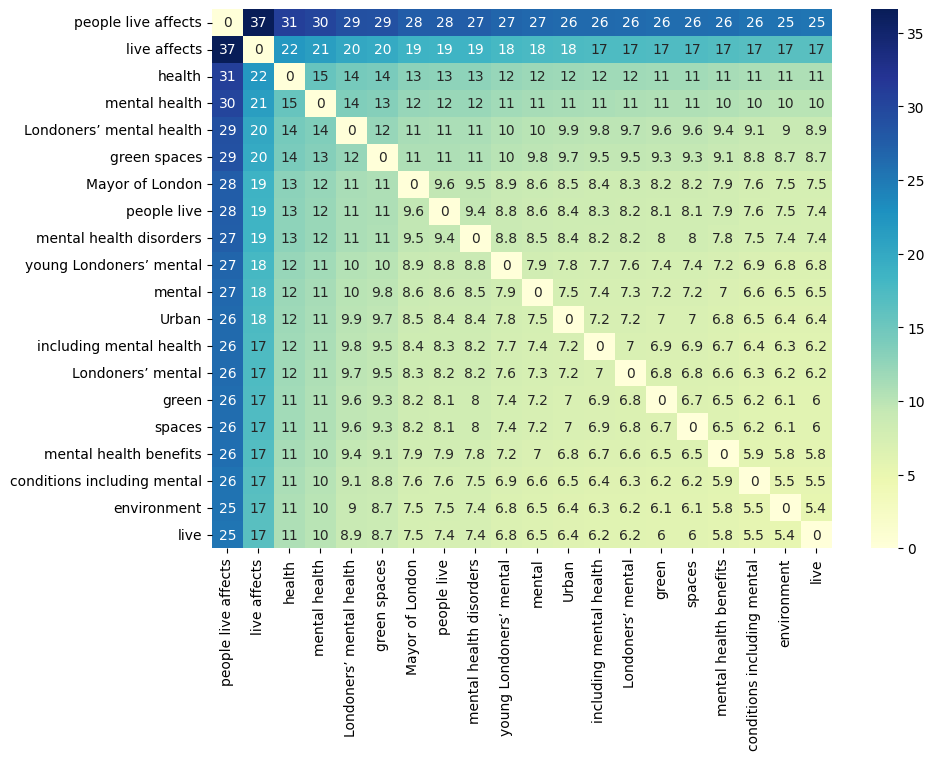

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new graph
G_weighted = nx.Graph()

# Add nodes
for keyword, score in keywords:
    G_weighted.add_node(keyword, size=1/score)

# Add weighted edges
for i in range(len(keywords)):
    for j in range(i+1, len(keywords)):
        # Use the importance of the edge as the weight
        weight = (G_weighted.nodes[keywords[i][0]]['size'] + G_weighted.nodes[keywords[j][0]]['size']) / 2
        G_weighted.add_edge(keywords[i][0], keywords[j][0], weight=weight)

# Get the adjacency matrix with weights
adj_matrix = nx.adjacency_matrix(G_weighted, weight='weight').todense()

# Convert to a numpy array
adj_array = np.array(adj_matrix)

# Create a DataFrame
df = pd.DataFrame(adj_array, index=G_weighted.nodes(), columns=G_weighted.nodes())

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.show()


#### Hinton Diagram: Edge Importance

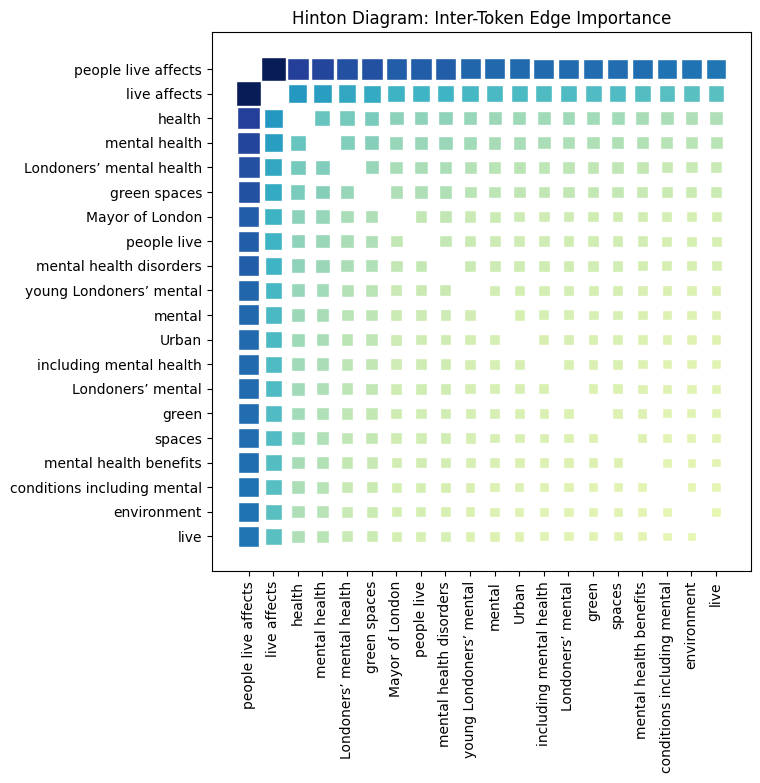

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualising a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')

    # Normalize the cell sizes
    matrix = matrix / np.max(np.abs(matrix))

    for (x, y), w in np.ndenumerate(matrix):
        color = plt.cm.YlGnBu(np.abs(w))
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor='white')  # Add white edges
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

    # Add x-labels and y-labels
    ax.set_xticks(np.arange(matrix.shape[1]))
    ax.set_yticks(np.arange(matrix.shape[0]))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.set_yticklabels(df.index)

# Create a Hinton diagram
plt.figure(figsize=(10, 7))
hinton(df.values)
plt.title('Hinton Diagram: Inter-Token Edge Importance')  # Add title
plt.show()


## Generate Texts based on Context-Free Grammars

A Context-Free Grammar (CFG) is composed of four parts:

Non-terminal symbols: These are symbols that you can replace in the production rules. In natural language processing, non-terminal symbols often represent parts of speech or phrase types, such as noun phrases (NP), verb phrases (VP), etc.
Terminal symbols: These are symbols that you cannot replace further in the production rules. In natural language processing, terminal symbols are usually words.
Production rules: These rules define how to generate new strings of symbols from one or more symbols. Each rule has a left-hand side non-terminal symbol, and a right-hand side composed of non-terminal and/or terminal symbols.
Start symbol: This is a special non-terminal symbol used to start the generation process.

Here is an example of a simple CFG:

*   Non-terminal symbols: S, NP, VP, Det, N, V
*   Terminal symbols: the, cat, sat, on, mat
*   Production rules:

S -> NP VP

NP -> Det N

VP -> V NP

Det -> ‘the’

N -> ‘cat’ | ‘mat’

V -> ‘sat’

Start symbol: S



---



In this example:

S stands for “Sentence”, usually used as the start symbol, representing a complete sentence.
NP stands for “Noun Phrase”, representing a phrase composed of a noun and possible modifiers (such as articles, adjectives, etc.).
VP stands for “Verb Phrase”, representing a phrase composed of a verb and possible complements (such as objects, adverbials, etc.).
Det stands for “Determiner”, representing the articles in English, such as “the”.
N stands for “Noun”, here it can be “cat” or “mat”.
V stands for “Verb”, here it is “sat”.
The production rules describe how to generate new strings of symbols from one or more symbols. For example, the rule S -> NP VP means a sentence can be composed of a noun phrase and a verb phrase.

In [ ]:
from nltk import CFG
from nltk.parse import generate

# Define a Context-Free Grammar (CFG)
grammar = CFG.fromstring("""
    S -> 'a' S 'b' | ''
""")

# Generate sentences using this grammar
for sentence in generate.generate(grammar, n=10, depth=15):
    print(''.join(sentence))


aaaaaaaaaaaaabbbbbbbbbbbbb
aaaaaaaaaaaabbbbbbbbbbbb
aaaaaaaaaaabbbbbbbbbbb
aaaaaaaaaabbbbbbbbbb
aaaaaaaaabbbbbbbbb
aaaaaaaabbbbbbbb
aaaaaaabbbbbbb
aaaaaabbbbbb
aaaaabbbbb
aaaabbbb


In [ ]:
# Define a Context-Free Grammar (CFG)
grammar = CFG.fromstring("""
    S -> NP VP | NP VP PP
    NP -> DetV Nv | DetC Nc | DetV Nv PP | DetC Nc PP
    VP -> V NP | V NP PP
    PP -> P NP
    DetV -> 'an'
    DetC -> 'a'
    Nv -> 'Asian_community'
    Nc -> 'city' | 'school' | 'river' | 'railway_station'
    V -> 'is' | 'wants'
    P -> 'in' | 'by'
""")
# Generate sentences using this grammar
for sentence in generate.generate(grammar, n=10, depth=5):  # Limit recursion depth to 5
    print(' '.join(sentence))


an Asian_community is an Asian_community
an Asian_community is a city
an Asian_community is a school
an Asian_community is a river
an Asian_community is a railway_station
an Asian_community wants an Asian_community
an Asian_community wants a city
an Asian_community wants a school
an Asian_community wants a river
an Asian_community wants a railway_station


In [ ]:
import random
from nltk import ChartParser

# Define a Context-Free Grammar (CFG)
grammar = CFG.fromstring("""
    S -> NP VP | NP VP PP
    NP -> DetV Nv | DetC Nc | DetV Nv PP | DetC Nc PP
    VP -> V NP | V NP PP
    PP -> P NP
    DetV -> 'an'
    DetC -> 'a'
    Nv -> 'Asian_community'
    Nc -> 'city' | 'school' | 'river' | 'railway_station'
    V -> 'is' | 'wants'
    P -> 'in' | 'by'
""")

# create a parser
parser = ChartParser(grammar)

# Generate sentences using this grammar
sentences = []
for sentence in generate.generate(grammar, n=20, depth=5):  # Limit recursion depth to 15
    sentence = ' '.join(sentence)
    if any(parser.parse(sentence.split())):
        sentence = sentence.replace('_', ' ')
        sentence = sentence[0].upper() + sentence[1:]  # Convert to sentence case
        sentences.append(sentence)

# Shuffle and print the sentences
random.shuffle(sentences)
for sentence in sentences[:15]:
    print(sentence)


An Asian community is a city
A city is a school
A city wants a school
An Asian community wants a railway station
An Asian community wants a school
A city is a city
A city wants a railway station
A city wants an Asian community
An Asian community wants a river
An Asian community is a railway station
A city wants a river
An Asian community is an Asian community
A city wants a city
A city is a railway station
An Asian community is a school
